In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import color_palette, JointGrid
from utils import df_to_supervised_classification

filepath = './MHEALTHDATASET/mHealth_subject1.log'

data = pd.read_csv(filepath, sep='\t', skipinitialspace=True, header=None) #parse_dates=[0]
data.columns = ['acc_chest_x', 'acc_chest_y', 'acc_chest_z', 
                'elec_sig_1', 'elec_sig_2', 
                'acc_left_ank_x', 'acc_left_ank_y', 'acc_left_ank_z',
                'gyro_left_ank_x', 'gyro_left_ank_y', 'gyro_left_ank_z',
                'magneto_left_ank_x', 'magneto_left_ank_y', 'magneto_left_ank_z',
                'acc_rig_arm_x', 'acc_rig_arm_y', 'acc_rig_arm_z',
                'gyro_rig_arm_x', 'gyro_rig_arm_y', 'gyro_rig_arm_z',
                'magneto_rig_arm_x', 'magneto_rig_arm_y', 'magneto_rig_arm_z',
                'label']

# print(data.head())
X = data[:].drop('label',axis=1)
Y = data['label']

* https://github.com/bhimmetoglu/datasciencecom-mhealth/blob/master/post.md
* http://scjournal.ius.edu.ba/index.php/scjournal/article/view/97/98
* https://arxiv.org/pdf/1809.04356.pdf


- [Python module for machine learning time series](https://github.com/dmbee/seglearn)


In [2]:
df = df_to_supervised_classification(data, 'label', 5, 1)

print(df.shape)

(161275, 139)


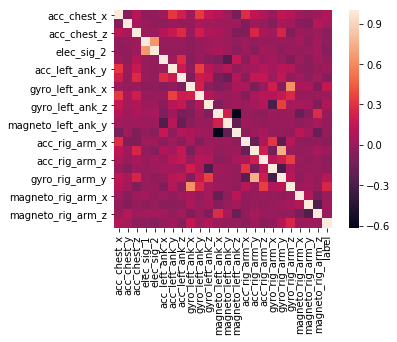

In [3]:
# data.groupby(['label']).count()
import seaborn as sns

cor = data.corr()

f = sns.heatmap(cor, square=True)

In [39]:
import sys
sys.path.append('/codigos/som/')
from som import SOM
# sys.path.remove(sys.path[-1])
# print(sys.path)

ModuleNotFoundError: No module named 'som'